# Principal Components Analysis

## Preprocess

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from statsmodels.multivariate.pca import PCA
import warnings

warnings.filterwarnings("ignore")

In [2]:
# read file
adl_path = "../data/data_adl.pkl"
df = pd.read_pickle(adl_path)

## Function Definition

In [3]:
def pca_result(df, n=1):
    pca = PCA(n_components=n)
    df_nd = pca.fit_transform(df)
    df_recon = pca.inverse_transform(df_nd).round(0)
    df_recon[df_recon<=0] = 0
    df_recon_err = np.mean(np.sum(np.square(df_recon - df), axis=1))
    cols = [("Component" + str(i+1)) for i in range(pca.components_.shape[0])]
    components = pd.DataFrame(pca.components_.T, columns=cols, index=df.columns)
    explained_var = pca.explained_variance_ratio_.sum()
    result = {
        "pca": pca,
        "pca_components": components,
        "explained_variance": explained_var,
        "data_dimension_reduction": df_nd,
        "data_reconstruction": df_recon,
        "data_reconstruction_error": df_recon_err,
    }
    return result

## PCA

In [4]:
pca1 = pca_result(df, 1)
pca2 = pca_result(df, 2)
pca3 = pca_result(df, 3)

In [5]:
df_pca1 = np.array(df) @ np.array(pca1["pca_components"])
df_pca2 = np.array(df) @ np.array(pca2["pca_components"])
df_pca3 = np.array(df) @ np.array(pca3["pca_components"])

### Scree plot

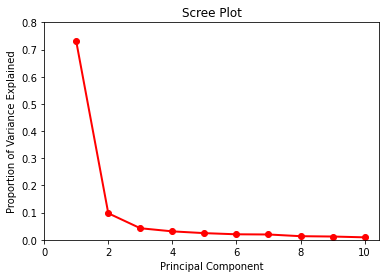

In [6]:
pca = pca_result(df, df.shape[1])["pca"]
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlim(left=0)
plt.ylim(top=0.8, bottom=0)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.savefig("../fig/pca_scree.png")
plt.show()

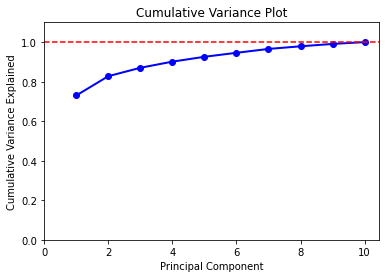

In [7]:
pca = pca_result(df, df.shape[1])["pca"]
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2, color="blue")
plt.xlim(left=0)
plt.ylim(top=1.1, bottom=0)
plt.title('Cumulative Variance Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.hlines(y=1, xmin=0, xmax=11, colors='red', linestyle="dashed")
plt.savefig("../fig/pca_cum_var.png")
plt.show()

### 1 PC

In [8]:
print(f"{1} PC: explained variance = {pca1['explained_variance']:.4f}")

1 PC: explained variance = 0.7301


### 2 PCs

In [9]:
print(f"{2} PCs: explained variance = {pca2['explained_variance']:.4f}")

2 PCs: explained variance = 0.8277


### 3 PCs

In [10]:
print(f"{3} PCs: explained variance = {pca3['explained_variance']:.4f}")

3 PCs: explained variance = 0.8702


### MLE

In [11]:
pca = PCA(n_components="mle")
pca.fit(df)
pca.n_components_

9

## Write Files

In [12]:
with open("../npy/data_adl_pca1.npy", 'wb') as f:
    np.save(f, df_pca1)
with open("../npy/data_adl_pca2.npy", 'wb') as f:
    np.save(f, df_pca2)
with open("../npy/data_adl_pca3.npy", 'wb') as f:
    np.save(f, df_pca3)

In [13]:
writer = pd.ExcelWriter('../table/pca_pc.xlsx', engine='xlsxwriter')

pcs = np.round(pca_result(df, df.shape[1])["pca_components"], 4)
old_names = [f"Component{i}" for i in range(1, df.shape[1] + 1)]
new_names = [f"PC{i}" for i in range(1, df.shape[1] + 1)]
pcs = pcs.rename(columns=dict(zip(old_names, new_names)))
pcs.to_excel(writer, sheet_name='pc')
pcs.iloc[:, :5].to_excel(writer, sheet_name='pc1-5')
pcs.iloc[:, 5:].to_excel(writer, sheet_name='pc6-10')

writer.close()